In [20]:
import keras
from keras.models import Sequential, load_model, model_from_json
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, AveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [21]:
train_df = pd.read_csv('data/data_train_mnist.csv')
test_df = pd.read_csv('data/data_test_mnist.csv')


In [22]:
train_df.head()

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,0.0,15.0,14.0,10.0,30.0,62.0,88.0,109.0,129.0,114.0,...,176.0,179.0,164.0,177.0,184.0,141.0,50.0,8.0,11.0,12.0
1,1.0,121.0,140.0,151.0,170.0,171.0,194.0,196.0,188.0,172.0,...,175.0,175.0,172.0,171.0,157.0,144.0,130.0,98.0,73.0,15.0
2,1.0,23.0,200.0,21.0,22.0,25.0,26.0,25.0,22.0,6.0,...,126.0,114.0,100.0,99.0,101.0,69.0,110.0,33.0,28.0,30.0
3,1.0,101.0,82.0,90.0,100.0,137.0,145.0,178.0,125.0,141.0,...,159.0,128.0,127.0,110.0,119.0,135.0,143.0,159.0,120.0,85.0
4,0.0,70.0,90.0,167.0,179.0,95.0,82.0,33.0,0.0,0.0,...,214.0,211.0,198.0,210.0,203.0,191.0,166.0,56.0,0.0,0.0


In [23]:
train_df = np.array(train_df,dtype='float32')
test_df = np.array(test_df,dtype='float32')
x_train =  train_df[:,1:] /255
y_train =  train_df[:,0]

x_test =  test_df[:,1:] /255
y_test =  test_df[:,0]

In [24]:
# x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=12345)
x_validate = x_test
y_validate = y_test

In [25]:
image_sample = x_test[300].reshape(28,28) #reshape into current dimension


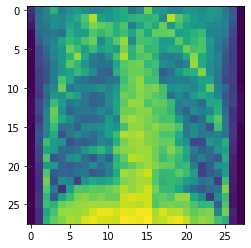

In [26]:
plt.imshow(image_sample)
plt.show()

# Create CNN Model

In [27]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape:{}'.format(x_train.shape))
print('x_test shape:{}'.format(x_test.shape))
print('x_validate shape:{}'.format(x_validate.shape))


x_train shape:(5216, 28, 28, 1)
x_test shape:(624, 28, 28, 1)
x_validate shape:(624, 28, 28, 1)


In [29]:
name = 'model_1'
cnn_model_1 = Sequential([
    Conv2D(filters=32, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=1, name='MaxPool-1'),
    Conv2D(filters=64, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-2'),
    MaxPooling2D(pool_size=2, name='MaxPool-2'),
    Dropout(rate=0.2, name='Dropout'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense_1'),
    Dense(128, activation='relu', name='Dense_2'),
    Dense(2, activation='softmax', name='Output')
    
],name=name)

name = 'model_2'
cnn_model_2 = Sequential([
    Conv2D(filters=32, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-1'),
    AveragePooling2D(pool_size=1, name='avgPool-1'),
    Conv2D(filters=128, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-2'),
    AveragePooling2D(pool_size=2, name='AvgPool-2'),
    Dropout(rate=0.2, name='Dropout'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense_1'),
    Dense(128, activation='relu', name='Dense_2'),
    Dense(2, activation='softmax', name='Output')
    
],name=name)

"""name = 'model_3'
cnn_model_3 = Sequential([
    Conv2D(filters=64, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=3, name='maxPool-1'),
    Conv2D(filters=128, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-2'),
    AveragePooling2D(pool_size=1, name='avgPool-1'),
    Conv2D(filters=64, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-3'),
    MaxPooling2D(pool_size=3, name='maxPool-2'),
    Conv2D(filters=128, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-4'),
    AveragePooling2D(pool_size=1, name='avgPool-2'),
    #Dropout(0.2, name='Dropout'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense_1'),
    Dense(128, activation='relu', name='Dense_2'),
    Dense(64, activation='relu', name='Dense_3'),
    Dense(2, activation='softmax', name='Output')
],name=name)"""

cnn_models = [cnn_model_1, cnn_model_2]
              #cnn_model_3]

In [30]:
im_shape

(28, 28, 1)

In [31]:
for model in cnn_models:
    model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 28, 28, 32)        64        
_________________________________________________________________
MaxPool-1 (MaxPooling2D)     (None, 28, 28, 32)        0         
_________________________________________________________________
Conv2D-2 (Conv2D)            (None, 28, 28, 64)        2112      
_________________________________________________________________
MaxPool-2 (MaxPooling2D)     (None, 14, 14, 64)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
Dense_1 (Dense)              (None, 128)               1605

In [25]:
# from keras.utils import plot_model
# plot_model(cnn_model_1, to_file='model.png')

In [26]:
# SVG(model_to_dot(cnn_model_1, show_shapes=True,show_layer_names=True).create(prog='dot', format='svg'))

In [27]:
# SVG(model_to_dot(cnn_model_2, show_shapes=True,show_layer_names=True).create(prog='dot', format='svg'))

In [32]:
history_dict = {}
for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer = Adam(),
        metrics=['accuracy'])
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=10, verbose=True,
        validation_data=(x_validate, y_validate))
    history_dict[model.name] = history
    


Train on 5216 samples, validate on 624 samples
Epoch 1/10
5216/5216 [==============================] - 9s 2ms/step - loss: 0.5747 - accuracy: 0.7272 - val_loss: 0.7213 - val_accuracy: 0.6250
Epoch 2/10
5216/5216 [==============================] - 9s 2ms/step - loss: 0.4619 - accuracy: 0.7870 - val_loss: 0.5943 - val_accuracy: 0.6506
Epoch 3/10
5216/5216 [==============================] - 10s 2ms/step - loss: 0.3549 - accuracy: 0.8528 - val_loss: 0.4161 - val_accuracy: 0.8173
Epoch 4/10
5216/5216 [==============================] - 10s 2ms/step - loss: 0.2721 - accuracy: 0.8911 - val_loss: 0.3516 - val_accuracy: 0.8606
Epoch 5/10
5216/5216 [==============================] - 10s 2ms/step - loss: 0.2422 - accuracy: 0.9015 - val_loss: 0.5605 - val_accuracy: 0.7484
Epoch 6/10
5216/5216 [==============================] - 10s 2ms/step - loss: 0.1947 - accuracy: 0.9214 - val_loss: 0.3778 - val_accuracy: 0.8205
Epoch 7/10
5216/5216 [==============================] - 10s 2ms/step - loss: 0.1653 -

KeyError: 'val_acc'

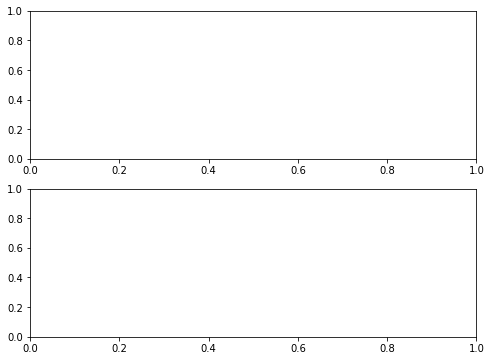

In [29]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [30]:
score = cnn_model_1.evaluate(x_test, y_test, verbose=1)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Acc  : {:.4f}'.format(score[1]))


624/624 [==============================] - 0s 256us/step
Test Loss : 0.5370
Test Acc  : 0.7548


In [31]:
score = cnn_model_2.evaluate(x_test, y_test, verbose=1)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Acc  : {:.4f}'.format(score[1]))


624/624 [==============================] - 0s 271us/step
Test Loss : 0.6784
Test Acc  : 0.7420


In [7]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
# This is used for plotting the images.
img_shape = (img_size, img_size)

# Tuple with height, width and depth used to reshape arrays.
# This is used for reshaping in Keras.
img_shape_full = (img_size, img_size, 1)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 2

labels = ['Normal\n', 'Pneumonia\n']


In [9]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 16
    
    # Create figure with 4x4 sub-plots.
    fig, axes = plt.subplots(4, 4)
    fig.subplots_adjust(hspace=1.0, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

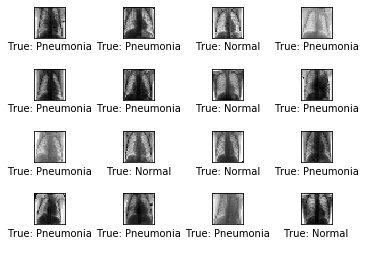

In [10]:
# Get the first images from the test-set.
random_data = np.random.randint(623, size= 16)
images = x_test[random_data]
cls_true = y_test[random_data]
cls_true = cls_true.astype(int)
cls_lbl = []
for i in range(len(cls_true)):
    cls_lbl = np.append(cls_lbl, labels[cls_true[i]])
    
# Get the true classes for those images.
cls_true = y_test[random_data]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_lbl)

In [11]:
print(random_data)

[442 298 451  98 304 360 212  21 263 372  12 438 283 599 255 164]


#  Model 1 

In [12]:

#Predict
#images = x_test[500:516]

images = x_test[random_data]

y_pred = cnn_model_1.predict(x=images) #swicth to model that we use 
cls_pred = np.argmax(y_pred,axis=1)
cls_lbl_pred = []
for i in range(len(y_pred)):
    cls_lbl_pred = np.append(cls_lbl_pred, labels[cls_pred[i]])
    

plot_images(images=images,
            cls_true=cls_lbl,
            cls_pred=cls_lbl_pred)



NameError: name 'cnn_model_1' is not defined

# Model 2

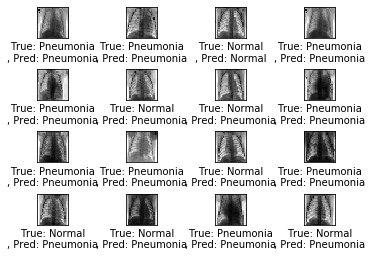

In [37]:
#Predict
#images = x_test[500:516]

images = x_test[random_data]

y_pred = cnn_model_2.predict(x=images) #swicth to model that we use 
cls_pred = np.argmax(y_pred,axis=1)
cls_lbl_pred = []
for i in range(len(y_pred)):
    cls_lbl_pred = np.append(cls_lbl_pred, labels[cls_pred[i]])
    

plot_images(images=images,
            cls_true=cls_lbl,
            cls_pred=cls_lbl_pred)

In [14]:
image = x_test[319]/255
image.shape

(784,)

In [17]:
image = image.reshape(1,28,28,1)
image.shape
labels = ['Normal\n', 'Pneumonia\n']

y_pred = model.predict(x=image)
cls_pred = np.argmax(y_pred,axis=1)
print(y_pred)
if y_pred[0,0] > y_pred[0,1]:
    confidence = round(y_pred[0,0], 2)
else:
    confidence = round(y_pred[0,1], 2)
print("diagnosa: ", labels[cls_pred[0]], "confidence: ", confidence)
image

[[0.01619697 0.98380303]]
diagnosa:  Pneumonia
 confidence:  0.98


array([[[[0.00107651],
         [0.00226067],
         [0.00192234],
         [0.00155325],
         [0.00167628],
         [0.00167628],
         [0.00130719],
         [0.00153787],
         [0.00184544],
         [0.00192234],
         [0.00287582],
         [0.00284506],
         [0.00326028],
         [0.00335256],
         [0.00347559],
         [0.00344483],
         [0.0028143 ],
         [0.00287582],
         [0.00178393],
         [0.00163014],
         [0.00126105],
         [0.0013687 ],
         [0.00089196],
         [0.00149173],
         [0.00161476],
         [0.00152249],
         [0.00189158],
         [0.00202999]],

        [[0.00099962],
         [0.00139946],
         [0.00215302],
         [0.00207612],
         [0.0016609 ],
         [0.00186082],
         [0.00189158],
         [0.00186082],
         [0.00183007],
         [0.00229143],
         [0.00244521],
         [0.00286044],
         [0.00321415],
         [0.00276817],
         [0.00299885],
         

### Saving Model

In [40]:
model1_json = cnn_model_1.to_json()
with open("model/model.json", "w") as json_file:
    json_file.write(model1_json)

In [41]:
cnn_model_1.save_weights("model/model1.h5")

### Load Model

In [16]:
json_file = open('model/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model/model1.h5')
